In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


In [3]:
print(mnist.data.shape)
print(mnist.target.shape)
print(mnist.DESCR)

(70000, 784)
(70000,)
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were cente

In [13]:
X, y = mnist.data, mnist.target.astype(np.int8)

let's show how the digits looks like

In [5]:
import matplotlib.pyplot as plt
import matplotlib 

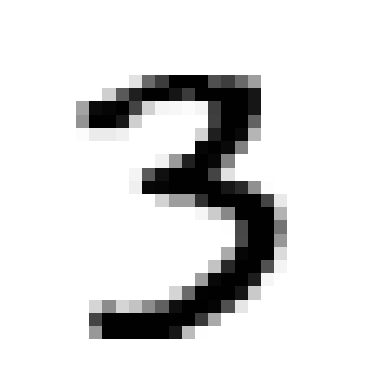

In [6]:
some_digit = X[10000].reshape(28,28)
plt.imshow(some_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()

Now we will split train and test dataset

In [14]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], y[:60000], y[60000:]

the problem is the X_train contains the numbers from 0 to 9 in order so we will shuffle it first

In [15]:
shuffled_index = np.random.permutation(60000)
X_train, Y_train = X_train[shuffled_index], Y_train[shuffled_index]

## Training the model

now i will train a simple binary classification model to detect if the digit is 3 or not

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [16]:
Y_train_3 = (Y_train == 3)
Y_test_3 = (Y_test == 3)

In [17]:
# Train a simple SGD classifier to detect the digit 3
sgd_clsf = SGDClassifier(random_state=42)
sgd_clsf.fit(X_train, Y_train_3)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


model acuracy score

In [19]:
Y_predict_3 = sgd_clsf.predict(X_test)
sum(Y_predict_3 == Y_test_3)/len(Y_test_3)

np.float64(0.9686)

now doing it with cross validation

In [21]:
cross_val_score(sgd_clsf, X_train, Y_train_3, cv=3, scoring='accuracy')

array([0.96705, 0.9675 , 0.9695 ])